In [182]:
import numpy as np
from sklearn import neighbors 
from sklearn.metrics import mean_squared_error
#from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import neighbors 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from numpy import genfromtxt
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import math

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from time import process_time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV



In [169]:
df = pd.read_csv('cleaned.csv').drop(['Unnamed: 0'],axis=1)
df=df.dropna()
df

,price,Address,bedroom,bathroom,size_sqf,types,city,province,Latitude,Longitude
0,1425,Poplar,1,1,533,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
1,2245,Poplar,2,2,910,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
2,1350,Abbotsford West,1,1,538,Apt/Condo,Abbotsford,BC,49.039034,-122.430243
3,1725,Poplar,1,1,689,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
4,1625,Central Abbotsford,2,1,846,Apt/Condo,Abbotsford,BC,49.050438,-122.304470
...,...,...,...,...,...,...,...,...,...,...
3234,1535,Av. Lennox,1,1,700,House,Montreal,Quebec,45.512978,-73.624023
3235,6999,Rue Sherbrooke O.,2,2,1175,House,Montreal,Quebec,45.481598,-73.600424
3236,1437,Av. Somerled,2,1,770,House,Montreal,Quebec,45.467881,-73.638234
3237,3500,Tsse St-Denis,3,2,1800,House,Montreal,Quebec,45.516377,-73.566669


In [170]:
df1=df.drop(columns=['Address','province','Latitude','Longitude'])# I only control for city. 
df1['bedroom']=df1['bedroom'].astype("category") #
#df1['size_sqf_q2']=df1['size_sqf']*df1['size_sqf'] #I added bigger places additional square feet has smaller impact on price than small places. 


In [171]:
df_dummies = pd.get_dummies(data=df1)

In [172]:
training_data, testing_data = train_test_split(df_dummies, test_size=0.2, random_state=25)


In [173]:
y_train=training_data['price']
X_train=training_data.drop(columns=['price'])
y_test=testing_data['price']
X_test=testing_data.drop(columns=['price'])

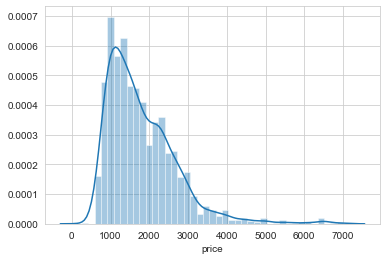

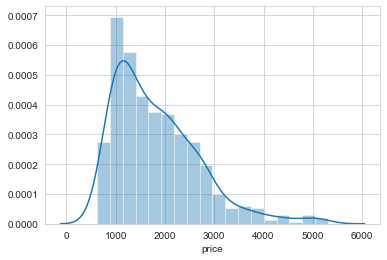

In [174]:
sns.set_style('whitegrid')
sns.distplot(y_train)
plt.show()
sns.distplot(y_test)
plt.show()


As we can see our train and test dataset have similar distribution. 

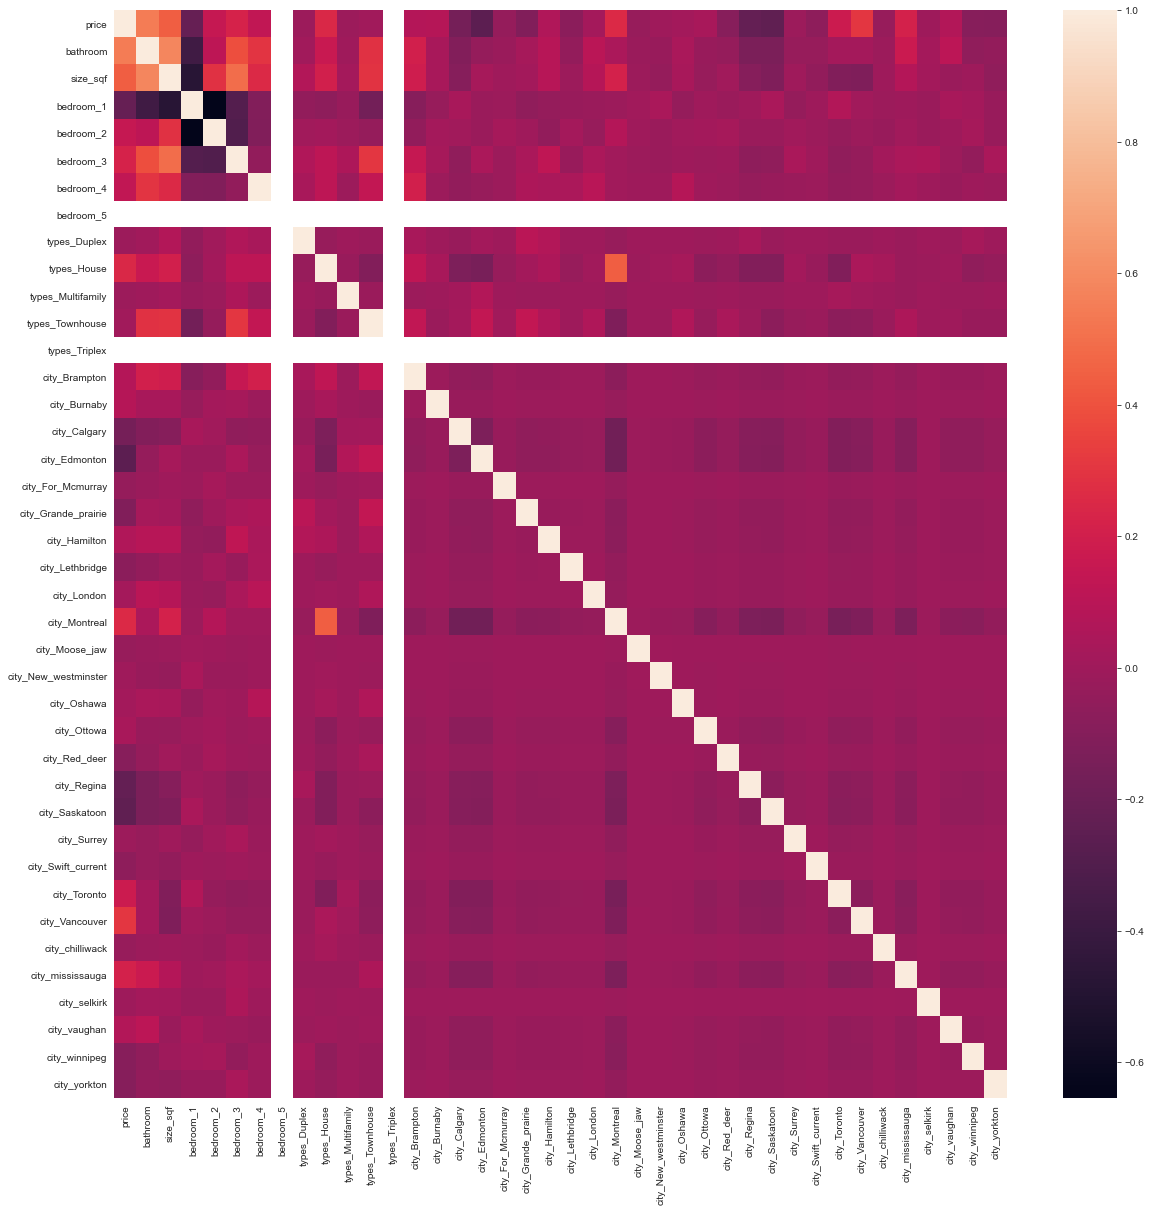

In [175]:
plt.figure(figsize=(20,20))
sns.heatmap(training_data.corr())


As we can see in the above graph, a lot of vairables in our model are correlated with each other. This may suggest that the linear regression is not a wise choice.

# Regresion (OLS)

In [176]:
model_ols = sm.OLS(y_train,X_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              981.3
Date:                Sun, 20 Feb 2022   Prob (F-statistic):                        0.00
Time:                        00:44:09   Log-Likelihood:                         -19857.
No. Observations:                2591   AIC:                                  3.979e+04
Df Residuals:                    2554   BIC:                                  4.001e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathroom               477.0330     24.632     19.366      0.000     428.732     525.333
size_sqf                 0.7797      0.062     12.525      0.000       0.658       0.902
bedroom_1              125.7144     42.608      2.951      0.003      42.166     209.263
bedroom_2              185.7211     50.087      3.708      0.000      87.505     283.937
bedroom_3              179.7445     67.543      2.661      0.008      47.301     312.188
bedroom_4              129.6706    105.119      1.234      0.217     -76.457     335.798
bedroom_5             5.179e-13   7.02e-12      0.074      0.941   -1.33e-11    1.43e-11
types_Duplex           -71.6086    159.879     -0.448      0.654    -385.115     241.897
types_House            -27.8165     33.920     -0.820      0.412     -94.330      38.697
types_Multifamily     -176.3532    165.700     -1.064      0.287    -501.274     148.567
types_Townhouse       -302.2123     48.988     -6.169      0.000    -398.273    -206.151
types_Triplex          3.61e-13   1.46e-12      0.248      0.804    -2.5e-12    3.22e-12
city_Brampton          326.7909     88.806      3.680      0.000     152.651     500.931
city_Burnaby          1237.8993    157.703      7.850      0.000     928.661    1547.137
city_Calgary           175.8520     51.674      3.403      0.001      74.524     277.180
city_Edmonton         -167.8528     52.735     -3.183      0.001    -271.260     -64.446
city_For_Mcmurray        1.3414    150.645      0.009      0.993    -294.056     296.739
city_Grande_prairie   -230.6194     78.052     -2.955      0.003    -383.671     -77.568
city_Hamilton          557.8755     84.798      6.579      0.000     391.595     724.156
city_Lethbridge       -144.4963    115.617     -1.250      0.211    -371.209      82.216
city_London            137.4676    137.499      1.000      0.318    -132.154     407.089
city_Montreal          748.6066     55.404     13.512      0.000     639.965     857.248
city_Moose_jaw        -400.0998    369.613     -1.082      0.279   -1124.872     324.673
city_New_westminster   841.8492    236.306      3.563      0.000     378.478    1305.220
city_Oshawa            427.5223    171.223      2.497      0.013      91.772     763.273
city_Ottowa            631.6733     68.313      9.247      0.000     497.720     765.627
city_Red_deer         -252.5896    108.800     -2.322      0.020    -465.936     -39.243
city_Regina           -124.4876     56.229     -2.214      0.027    -234.747     -14.228
city_Saskatoon        -156.7319     55.646     -2.817      0.005    -265.848     -47.616
city_Surrey            399.0745     97.039      4.113      0.000     208.792     589.357
city_Swift_current    -242.7194    176.495     

<ipython-input-143-2f03f4f782cf>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


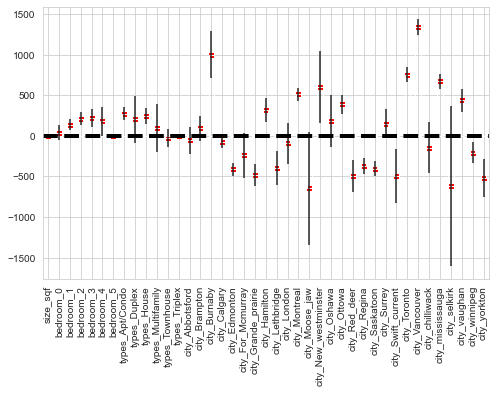

In [143]:
err_series = model_ols.params - model_ols.conf_int()[0] ##calculating error bar length
coef_df = pd.DataFrame({'coef': model_ols.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=10, 
           y=coef_df['coef'], color='red')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')


The above graph shows the impact of different independent variables on the rental price. as we can see, Vancouver is the most expensive city for rentals in Canada. On average, rentals located in Vancouver are $1303 more expensive than rentals in Abbotsford. Furthermore, rentals located in Toronto are cheaper than Vancouver but more expensive than Abbotsford

In [144]:
y_hat=model_ols.predict(X_test)
print('The mean square error for the test sample in the first model is %.2f' %mean_squared_error(y_test, y_hat))

The mean square error for the test sample in the first model is 200726.50


# OLS with log transformation

The histogram of y_train and y_test suggest that price is skewed to the right. Therefore, log transformation of the price might result in a better model

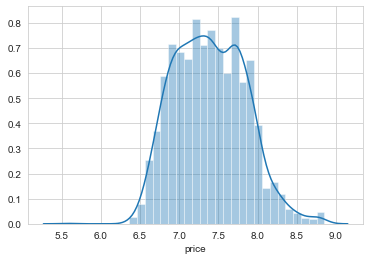

In [145]:
y_train_log=np.log1p(y_train)
sns.set_style('whitegrid')
sns.distplot(y_train_log)
plt.show()


The new plot for price is not skewed to right anymore. 

In [146]:
model_ols_log = sm.OLS(y_train_log,X_train).fit()
model_ols_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     266.2
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:34:52   Log-Likelihood:                 434.35
No. Observations:                2591   AIC:                            -792.7
Df Residuals:                    2553   BIC:                            -570.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathroom                 0.1736      0.010     17.543      0.000       0.154       0.193
size_sqf                 0.0004   2.55e-05     14.350      0.000       0.000       0.000
bedroom_0                2.9457      0.018    161.751      0.000       2.910       2.981
bedroom_1                3.0795      0.014    223.221      0.000       3.052       3.107
bedroom_2                3.1337      0.016    190.419      0.000       3.101       3.166
bedroom_3                3.1532      0.022    140.696      0.000       3.109       3.197
bedroom_4                3.1552      0.037     86.131      0.000       3.083       3.227
bedroom_5            -9.519e-15   2.56e-15     -3.722      0.000   -1.45e-14    -4.5e-15
types_Apt/Condo          3.1350      0.016    193.089      0.000       3.103       3.167
types_Duplex             3.1588      0.058     54.548      0.000       3.045       3.272
types_House              3.1210      0.019    164.529      0.000       3.084       3.158
types_Multifamily        3.0113      0.060     50.141      0.000       2.894       3.129
types_Townhouse          3.0411      0.023    131.603      0.000       2.996       3.086
types_Triplex        -1.908e-15      8e-17    -23.862      0.000   -2.07e-15   -1.75e-15
city_Abbotsford          0.5533      0.034     16.436      0.000       0.487       0.619
city_Brampton            0.6743      0.030     22.311      0.000       0.615       0.734
city_Burnaby             1.0183      0.059     17.315      0.000       0.903       1.134
city_Calgary             0.5136      0.016     31.702      0.000       0.482       0.545
city_Edmonton            0.2955      0.016     18.232      0.000       0.264       0.327
city_For_Mcmurray        0.4278      0.056      7.576      0.000       0.317       0.538
city_Grande_prairie      0.2448      0.027      8.908      0.000       0.191       0.299
city_Hamilton            0.7804      0.029     26.711      0.000       0.723       0.838
city_Lethbridge          0.2673      0.043      6.200      0.000       0.183       0.352
city_London              0.5936      0.050     11.807      0.000       0.495       0.692
city_Montreal            0.8377      0.016     53.449      0.000       0.807       0.868
city_Moose_jaw          -0.0178      0.141     -0.126      0.900      -0.295       0.259
city_New_westminster     0.9070      0.090     10.089      0.000       0.731       1.083
city_Oshawa              0.7165      0.064     11.131      0.000       0.590       0.843
city_Ottowa              0.8025      0.023     34.398      0.000       0.757       0.848
city_Red_deer            0.1965      0.040      4.906      0.000       0.118       0.275
city_Regina              0.2632      0.020     13.479      0.000       0.225       0.301
city_Saskatoon           0.2357      0.019     12.665    

The result suggests that the current model has larger R squared 

In [147]:
y_hat=model_ols_log.predict(X_test)
y_hat_1=np.exp(y_hat)-1
print('The mean square error for the test sample in the second model is %.2f' %mean_squared_error(y_test, y_hat_1))

The mean square error for the test sample in the second model is 205850.57


In [148]:
y_test

2691    2670
3156    4980
1529     949
1641    1025
1297     985
        ... 
164     2095
1776     951
2136    1900
2696    2779
3236    1437
Name: price, Length: 648, dtype: int64

# Decision tree

In [149]:
model=tree.DecisionTreeRegressor(random_state = 0)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [150]:
clf = DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [151]:
test=[]
nodes=[]
for val in ccp_alphas:
        model=DecisionTreeRegressor(random_state = 0,ccp_alpha= val)
        score = cross_val_score(model,X=X_train,y=y_train,scoring="neg_mean_squared_error",cv=5)
        test.append((val, score.mean()))
        model.fit(X_train,y_train)
        nodes.append((val,model.tree_.node_count))

In [152]:
df1 = pd.DataFrame(test, 
             columns=['alpha', 
                      'mse'])
df2 = pd.DataFrame(nodes, 
             columns=['alpha', 
                      'nodes'])
df2['mse']= -df1['mse']

Text(0.5, 1.0, 'The relationship between the number of nodes and MSE')

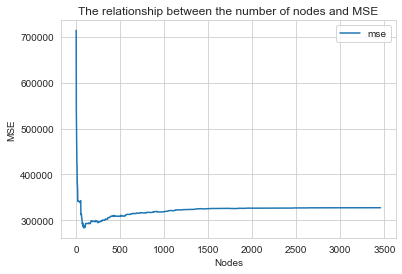

In [153]:
df2.plot(x ='nodes', y='mse', kind = 'line')
plt.ylabel('MSE')
plt.xlabel('Nodes')
plt.title('The relationship between the number of nodes and MSE')



In [154]:
df2.loc[df2['mse'] ==df2['mse'].min(), 'nodes'] ## the result says that the number of nodes for having minimum mse is 29

1259    89
Name: nodes, dtype: int64

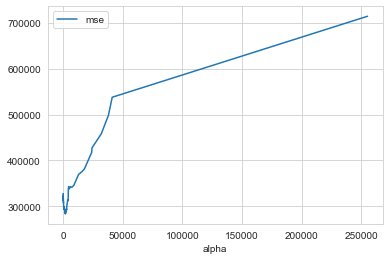

In [155]:
df2.plot(x ='alpha', y='mse', kind = 'line')

In [156]:
alpha_model=df2.loc[df2['mse'] ==df2['mse'].min(), 'alpha'] ## finding the min mse for alpha
alpha_model

1259    1856.685824
Name: alpha, dtype: float64

In [157]:
model_cross=tree.DecisionTreeRegressor(random_state = 0, ccp_alpha=11647.355982)

In [158]:
model_cross.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=11647.355982, random_state=0)

In [159]:
y_hat=model_cross.predict(X_test)
print(mean_squared_error(y_test, y_hat))

302682.29593584256


In [177]:
np.sqrt(302682.29593584256)

550.1656986180096

   # Random forest

In [160]:
# Set paramters for Grid Search
param_grid =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              }

In [161]:
# Initialise the random forest model 
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 0, bootstrap=True)

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
Tuned_RandForest = GridSearchCV(estimator=RandForest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)


In [162]:
Tuned_RandForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'max_features': [0.1, 0.3, 0.6],
                         'n_estimators': [200, 300, 400, 500, 600]},
             scoring='neg_root_mean_squared_error')

Random Forest Regressor


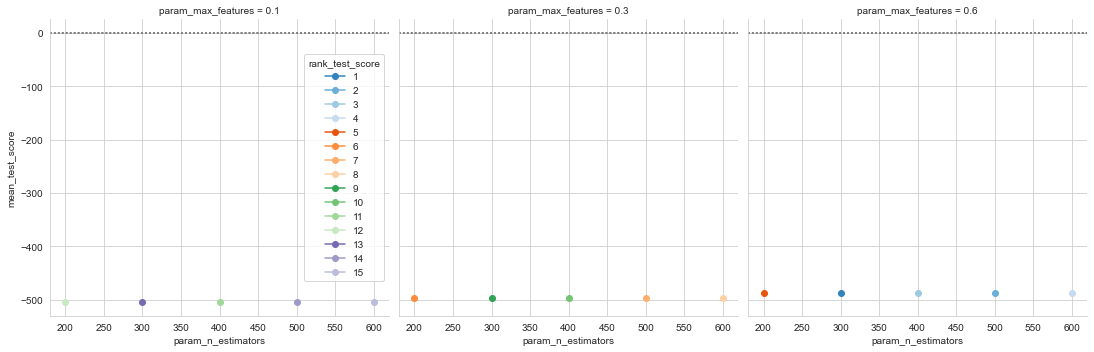

In [163]:
Results = pd.DataFrame(Tuned_RandForest.cv_results_)
Results_Best = Results.loc[Results.rank_test_score==1]
    
print('Random Forest Regressor')
#Results = Results.loc[Results.rank_test_score==1]

# Create a plot to show all models 

col = ['param_max_features']

for col in col:
    grid = sns.FacetGrid(Results, col=col, hue='rank_test_score', palette="tab20c", legend_out=False,
                         col_wrap=5, height=5)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, y=0, ls=":", c=".5")

    # Draw marker on plot and decide what parameters to plot
    grid.map(plt.plot, "param_n_estimators", "mean_test_score", marker="o")

    # Adjust the arrangement of the plots
    grid.fig.tight_layout(w_pad=1)
    
    # Add legend to gird 
    grid.add_legend()


The above graph shows the results of all models. As it is is obvious best result best on rank test scre is param_n_estimators==600 and param_max_features=0.6

Calculating random forest performance based on the test dataset.

In [164]:
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 0, bootstrap=True,n_estimators=600,max_features=0.6)

In [165]:
RandForest.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, n_estimators=600, n_jobs=-1,
                      random_state=0)

In [166]:
y_hat=RandForest.predict(X_test)
print(mean_squared_error(y_test, y_hat))

202937.86524622282


In [178]:
np.sqrt(202937.86524622282)

450.48625422561213

# ridge regression

In [183]:
# finding the best alpha
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 39)

Text(0, 0.5, 'weights')

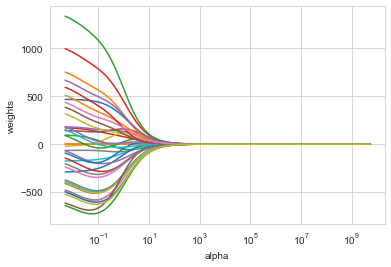

In [184]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [186]:
regr_cv = RidgeCV(alphas=alphas)

In [188]:
reg_model=regr_cv.fit(X_train, y_train)

In [191]:
y_hat=reg_model.predict(X_test)
sqr=mean_squared_error(y_test, y_hat)
np.sqrt(sqr)

447.4558488763974

# lasso model

In [ ]:
#First you have to define all the possible alphas then create GridSearchCV. And
Tuned_RandForest = GridSearchCV(estimator=RandForest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
